In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("datam.csv",header=None)

In [5]:
df.head()

,0,1
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [10]:
df.columns=["data1","data2"]

In [11]:
df.head()

,data1,data2
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [15]:
x=df.iloc[:,0]
y=df.iloc[:,1]

In [16]:
x

0     32.502345
1     53.426804
2     61.530358
3     47.475640
4     59.813208
        ...    
95    50.030174
96    49.239765
97    50.039576
98    48.149859
99    25.128485
Name: data1, Length: 100, dtype: float64

In [17]:
y

0     31.707006
1     68.777596
2     62.562382
3     71.546632
4     87.230925
        ...    
95    81.536991
96    72.111832
97    85.232007
98    66.224958
99    53.454394
Name: data2, Length: 100, dtype: float64

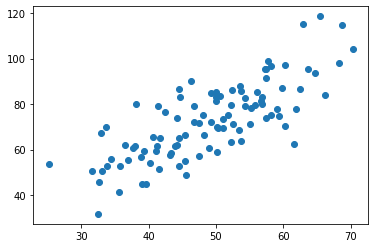

In [18]:
plt.scatter(x,y)

In [27]:
m=0
c=0
L=0.0001
epochs=1000
n=int(len(x))
for i in range(epochs):
    y_pred=m*x+c
    d_m=(-2/n)*sum(x*(y-y_pred))
    d_c=(-2/n)*sum((y-y_pred))
    m=m-L*d_m
    c=c-L*d_c
y_pred=m*x+c
print(m,c)
print(y,y_pred)

1.4777440851894448 0.08893651993741357
0     31.707006
1     68.777596
2     62.562382
3     71.546632
4     87.230925
        ...    
95    81.536991
96    72.111832
97    85.232007
98    66.224958
99    53.454394
Name: data2, Length: 100, dtype: float64 0     48.119085
1     79.040080
2     91.015059
3     70.245782
4     88.477551
        ...    
95    74.020731
96    72.852709
97    74.034624
98    71.242106
99    37.222406
Name: data1, Length: 100, dtype: float64


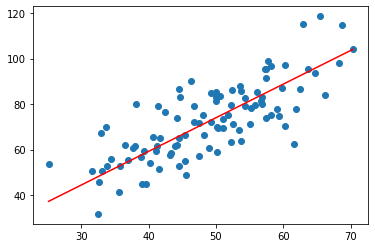

In [29]:
plt.scatter(x,y)
plt.plot([min(x),max(x)],[min(y_pred),max(y_pred)],color="red")

In [33]:
rmse=np.sqrt((sum(y-y_pred)**2)/n)
print(rmse)

2.98214518244547


In [49]:
class LinearRegression:
    def __init__(self,L,epochs,m,c):
        self.L=L
        self.epochs=epochs
        self.m=m
        self.c=c
    def fit(self,x,y):
        n=float(len(x))
        for i in range(self.epochs):
            y_pred=self.m*x+self.c
            d_m=(-2/n)*sum(x*(y-y_pred))
            d_c=(-2/n)*sum((y-y_pred))
            m=self.m-self.L*d_m
            c=self.c-self.L*d_c
        return m,c
        
    def predict(self,m,c,x):
        final_pred=m*x+c
        return final_pred

In [51]:

m=0
c=0
x=df.iloc[:,0]
y=df.iloc[:,1]
model=LinearRegression(0.001,1000,0,0)
m,c=model.fit(x,y)
pred=model.predict(m,c,x)
print(pred)

0     239.710603
1     393.938573
2     453.667463
3     350.074308
4     441.010859
         ...    
95    368.903025
96    363.077155
97    368.972321
98    355.043778
99    185.360067
Name: 0, Length: 100, dtype: float64
